In [3]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data import Dataset, DataLoader




In [4]:
! pip install torch

In [5]:
import random
def set_seed(SEED):
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
set_seed(40)

In [6]:
#Load Data
fully_processed_path = '../data/fully_processed/full_normalized_None.csv'
dataset = pd.read_csv(fully_processed_path)

#print(dataset.columns)
#print(dataset)

#X, y = dataset.drop(["name", "is_all_star"], axis=1), dataset["is_all_star"]

X = dataset.drop(['name'],axis=1)


In [7]:
#normalize every player feature based on position and season

In [8]:
SEED = 69
train_ratio = 0.6
test_ratio = 0.2
val_ratio = 0.2

X_train, X_tmp = train_test_split(X, test_size=test_ratio+val_ratio)
X_test, X_val = train_test_split(X_tmp,test_size=val_ratio/(val_ratio + test_ratio))

In [9]:
'''
all_stars = X_train[X_train['is_all_star'] == 1]
non_all_stars = X_train[X_train['is_all_star'] == 0]
all_stars = all_stars.sample(n=non_all_stars.shape[0], replace = True)
X_train = pd.concat([all_stars, non_all_stars])
X_train = X_train.sample(frac=1)
'''

"\nall_stars = X_train[X_train['is_all_star'] == 1]\nnon_all_stars = X_train[X_train['is_all_star'] == 0]\nall_stars = all_stars.sample(n=non_all_stars.shape[0], replace = True)\nX_train = pd.concat([all_stars, non_all_stars])\nX_train = X_train.sample(frac=1)\n"

In [10]:
#X.head()
X_train[X_train['is_all_star'] == 1]

,age,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,...,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,POS_CENTER,POS_POINT GUARD,POS_POWER FORWARD,POS_SHOOTING GUARD,POS_SMALL FORWARD,is_all_star
8392,3.026412,0.881908,0.866351,0.942753,-0.042901,-1.133944,0.597906,0.827797,0.402423,0.613014,...,0.799677,0.309593,0.838864,1.094383,0,0,0,1,0,1
7656,0.231294,1.010335,1.928625,1.789750,0.656781,0.604894,0.914289,0.061403,-0.078750,-0.050452,...,2.192356,0.312240,1.840409,4.144447,0,1,0,0,0,1
7330,0.316904,1.139628,1.787738,2.923514,0.511870,-0.319356,0.919078,2.172290,4.954738,4.764279,...,2.597015,1.713709,3.098528,4.365603,0,1,0,0,0,1
5096,2.229294,0.576916,1.048563,0.813756,0.258776,-0.120820,-0.568190,-1.055545,0.929528,0.043767,...,0.764021,0.994624,0.957654,1.677385,1,0,0,0,0,1
3462,1.290585,0.912610,1.544014,1.020626,0.771698,-0.219654,1.794169,-0.581855,0.485424,0.069559,...,1.255009,0.489169,1.166839,1.833439,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8441,-0.173618,0.855893,1.251326,3.194629,0.662102,-0.742527,1.200273,0.512421,3.396645,2.992803,...,2.854890,2.929573,3.375981,5.654306,0,0,1,0,0,1
2282,-1.068500,0.629686,1.613921,1.199162,0.636461,0.167689,0.447669,-0.505076,1.098936,0.471207,...,1.136576,-0.049448,0.884364,2.136887,1,0,0,0,0,1
4234,-0.732872,1.032885,1.890820,1.319847,0.603893,-0.221421,-0.748877,-0.462170,0.727995,0.337028,...,1.370046,0.631601,1.399376,3.010702,1,0,0,0,0,1
7546,0.315559,0.759251,1.363543,0.446350,0.263330,0.238866,0.281477,-0.492574,0.246469,0.094206,...,0.561201,1.302284,0.909956,1.818271,0,0,1,0,0,1


In [11]:
'''
#split dataset into 60/20/20 for training, testing, validation
SEED = 69
train_ratio = 0.6
test_ratio = 0.2
val_ratio = 0.2



X, y = X.drop(columns=['is_all_star']), X['is_all_star']

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=test_ratio+val_ratio)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=val_ratio/(val_ratio + test_ratio))
'''
X_train, y_train = X_train.drop(columns=['is_all_star']), X_train['is_all_star']
X_test, y_test = X_test.drop(columns=['is_all_star']), X_test['is_all_star']
X_val, y_val = X_val.drop(columns=['is_all_star']), X_val['is_all_star']

#convert data to tensors
X_train, X_test, X_val = torch.LongTensor(X_train.values), torch.LongTensor(X_test.values), torch.LongTensor(X_val.values)
y_train, y_test, y_val = torch.LongTensor(y_train.values), torch.LongTensor(y_test.values), torch.LongTensor(y_val.values)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

torch.Size([5698, 28]) torch.Size([1900, 28]) torch.Size([1900, 28])
torch.Size([5698]) torch.Size([1900]) torch.Size([1900])


In [12]:
class dataset(Dataset):
  def __init__(self,X,y):
    self.X = X.float()
    self.y = y.float()
    self.length = self.X.shape[0]
 
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]
  def __len__(self):
    return self.length

In [13]:
class AllStarClassifier(nn.Module):
    def __init__(self, LAYER_1=30, LAYER_2=10, LAYER_3 = 10, LAYER_4 = 10):
      super(AllStarClassifier, self).__init__()
      # dense layers
      self.layer1 = nn.Linear(LAYER_1, LAYER_2)
      self.layer2 = nn.Linear(LAYER_2,  LAYER_3)
      self.layer3 = nn.Linear(LAYER_3,  LAYER_4)
      self.layer4 = nn.Linear(LAYER_4,  1)

    def forward(self, X):

      X = self.layer1(X)
      X = F.relu(X)
      X = self.layer2(X)
      X = F.relu(X)
      X = self.layer3(X)
      X = F.relu(X)
      X = self.layer4(X)
      return torch.sigmoid(X)

In [14]:
loss_fn = nn.BCELoss()

learning_rate = 0.05
num_epochs = 20
batch_size = 32

In [15]:
train_set = dataset(X_train,y_train)
test_set = dataset(X_test,y_test)
val_set = dataset(X_val,y_val)
#DataLoader
train_loader = DataLoader(train_set,batch_size=batch_size,shuffle=False)
test_loader = DataLoader(test_set,batch_size=batch_size,shuffle=False)
val_loader = DataLoader(val_set,batch_size=batch_size,shuffle=False)

In [16]:
def EvalNet(dev_loader, net):
    num_correct = 0
    epoch_accuracy = []
    epoch_loss = []
    y_pred = []
    y_actual = []
    for i,(X,y) in enumerate(dev_loader):
        output = net.forward(X)

        loss = loss_fn(output,y.reshape(-1,1))
        epoch_loss.append(loss.detach().numpy())

        #get pred and actual values
        y_pred.append(output.detach().numpy().round().reshape((output.shape[0])))
        y_actual.append(y.detach().numpy().reshape((y.shape[0])))

        accuracy = (output.reshape(-1).detach().numpy().round() == y.detach().numpy()).sum()/X.shape[0]
        epoch_accuracy.append(accuracy)

    eval_loss_list.append(sum(epoch_loss)/len(epoch_loss))
    eval_accuracy_list.append(sum(epoch_accuracy) / len(epoch_accuracy))

    y_pred = np.concatenate(y_pred)
    y_actual = np.concatenate(y_actual)

    #print("Accuracy: %s" % (sum(epoch_accuracy) / len(epoch_accuracy)))

    return y_actual, y_pred
def PredictTeam(dev_loader)
def Metrics(dev_loader, net):
  y, y_pred = EvalNet(dev_loader, net)
  conversion_dict = {0: 'Non-All-Star' ,1: 'All-Star'}
  processed_y, processed_y_pred = [],[]
  for i in range(len(y)):
    processed_y.append(conversion_dict[y[i]])
    processed_y_pred.append(conversion_dict[y_pred[i]])
  #print(classification_report(processed_y, processed_y_pred, labels=['Non-All-Star', 'All-Star']))
  output_dict = classification_report(processed_y, processed_y_pred, labels=['Non-All-Star', 'All-Star'], output_dict=True, zero_division=0)
  return output_dict['All-Star']['f1-score']
  
def Train(net, train_loader, n_iter, dev_loader, learning_rate=0.01):
  optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

  max_all_star_f1 = 0.0
  best_epoch = 0
  for epoch in range(n_iter):
    total_loss = 0.0
    epoch_accuracy = []
    epoch_loss = []
    net.train()   #Put the network into training mode
    for i,(X,y) in enumerate(train_loader):
      output = net(X)
      
      loss = loss_fn(output,y.reshape(-1,1))
      epoch_loss.append(loss.detach().numpy())

      accuracy = (output.reshape(-1).detach().numpy().round() == y.detach().numpy()).sum()/(X.shape[0])
      epoch_accuracy.append(accuracy)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      

    train_accuracy_list.append(sum(epoch_accuracy)/len(epoch_accuracy))
    train_loss_list.append(sum(epoch_loss)/len(epoch_loss))
    
    net.eval()
    with torch.no_grad():
      #print(f"Loss on Train {epoch} = {sum(epoch_loss)/len(epoch_loss)}")
      all_star_f1 = Metrics(dev_loader, net)
      if all_star_f1 > max_all_star_f1:
        max_all_star_f1 = all_star_f1
        best_epoch = epoch
  return net, all_star_f1, best_epoch

In [17]:
set_seed(100)

eval_loss_list = []
train_loss_list = []
eval_accuracy_list = []
train_accuracy_list = []

as_classifier = AllStarClassifier(LAYER_1=X_train.shape[1], LAYER_2=50, LAYER_3=25, LAYER_4=10)
trained_nn = Train(as_classifier, train_loader, num_epochs, val_loader, learning_rate=learning_rate)


In [18]:
#return hyperparameters (learning_rate, num_epochs, batch_size, layer sizes) which maximize f1-score on All-Star class
def train_optimize_f1():
    train_set = dataset(X_train,y_train)
    test_set = dataset(X_test,y_test)
    val_set = dataset(X_val,y_val)
    
    best_params = {'layer2': None, 'layer3': None, 'layer4': None, 'lr': None, 'b_sz': None, 'epochs': None}
    best_f1 = 0.0
    '''
    for layer2 in range(25, 75+1, 10):
        for layer3 in range(10, 40+1, 10):
            for layer4 in range(6, 15+1, 3):
    '''
    layer2, layer3, layer4 = 50, 25, 10
    for lr in [0.1, 7e-2, 5e-2, 3e-2, 1e-2, 7e-3, 5e-3]:
        for b_sz in [16, 32, 64, 128, 256, 512]:
            learning_rate = lr
            batch_size = b_sz
            num_epochs = 40
            
            #DataLoader
            train_loader = DataLoader(train_set,batch_size=batch_size,shuffle=False)
            test_loader = DataLoader(test_set,batch_size=batch_size,shuffle=False)
            val_loader = DataLoader(val_set,batch_size=batch_size,shuffle=False)

            set_seed(100)
            as_classifier = AllStarClassifier(LAYER_1=X_train.shape[1], LAYER_2=layer2, LAYER_3=layer3, LAYER_4=layer4)
            trained_nn, max_f1, best_epoch = Train(as_classifier, train_loader, num_epochs, val_loader, learning_rate=learning_rate)

            if max_f1 > best_f1:
                best_params['layer2'], best_params['layer3'], best_params['layer4'] = layer2, layer3, layer4
                best_params['lr'], best_params['b_sz'], best_params['epochs'] = learning_rate, batch_size, best_epoch
                best_f1 = max_f1
            print(layer2, layer3, layer4, lr, b_sz, max_f1)
            print('Test:', Metrics(test_loader, trained_nn))
    print(best_params, best_f1)
    return best_params, best_f1


In [19]:
params, f1 = train_optimize_f1()

50 25 10 0.1 16 0.6903553299492385
Test: 0.7058823529411765
50 25 10 0.1 32 0.6598984771573604
Test: 0.6824644549763034
50 25 10 0.1 64 0.6934673366834171
Test: 0.6826923076923077
50 25 10 0.1 128 0.7164179104477612
Test: 0.6763285024154589
50 25 10 0.1 256 0.7200000000000001
Test: 0.6666666666666666
50 25 10 0.1 512 0.7236180904522613
Test: 0.6572769953051643
50 25 10 0.07 16 0.6766169154228856
Test: 0.6792452830188679
50 25 10 0.07 32 0.68
Test: 0.6792452830188679
50 25 10 0.07 64 0.6903553299492385
Test: 0.6829268292682927
50 25 10 0.07 128 0.7227722772277226
Test: 0.6634615384615383
50 25 10 0.07 256 0.7236180904522613
Test: 0.6635071090047394
50 25 10 0.07 512 0.05555555555555556
Test: 0.018348623853211007
50 25 10 0.05 16 0.6598984771573604
Test: 0.6635071090047394
50 25 10 0.05 32 0.6974358974358975
Test: 0.6826923076923077
50 25 10 0.05 64 0.7164179104477612
Test: 0.6763285024154589
50 25 10 0.05 128 0.7227722772277226
Test: 0.6635071090047394
50 25 10 0.05 256 0.73631840796019

In [20]:
print(dir(tqdm.tqdm_notebook))
print('tqdm_notebook' in dir(tqdm))
print(dir(tqdm.tqdm_notebook))

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
True
['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [21]:
train_loss_list

[0.29160328667257085,
 0.13620347100929175,
 0.10427426216426675,
 0.08841823950128931,
 0.07453295511750285,
 0.06993447067137995,
 0.0686588509674262,
 0.06755911354521842,
 0.06674649285454323,
 0.06617645945727783,
 0.0657668878212467,
 0.06528849818213067,
 0.064849576240343,
 0.06443609404845901,
 0.0640220891543815,
 0.0636628045630251,
 0.06319171418279784,
 0.06281926100501302,
 0.06243931781890797,
 0.062122750328853726,
 0.15673376137328124,
 0.07400795692253169,
 0.06991558204517838,
 0.06804222001088261,
 0.06683100026974152,
 0.06563726730278827,
 0.06476555909917113,
 0.06402111847919845,
 0.06312938797878198,
 0.06244069025039814,
 0.06160357434565726,
 0.060948516465335466,
 0.06021819952984617,
 0.05952601231944732,
 0.0587617353289499,
 0.0581573008555405,
 0.05745928084922247,
 0.05662928764898779,
 0.05569452982074196,
 0.055420636573484554,
 0.05460919348392747,
 0.05349116772975765,
 0.052964552212355714,
 0.05205740606295224,
 0.05110356006144004,
 0.05071809083

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

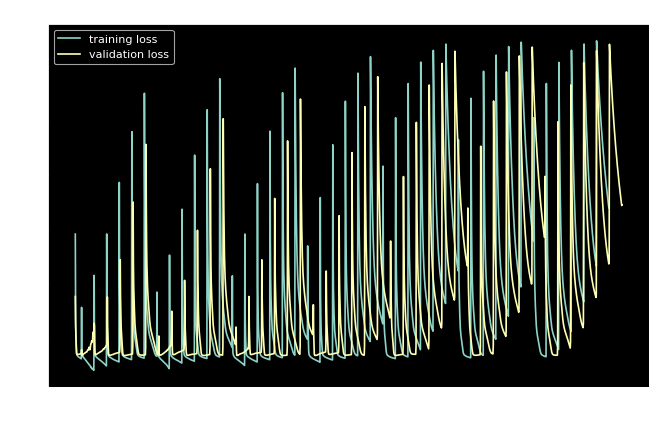

In [23]:
figure(figsize=(9.7, 6), dpi=80)

plt.plot(train_loss_list, label='training loss')
plt.plot(eval_loss_list, label='validation loss')
plt.title('Loss vs. Epochs Completed')
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.legend()

#plt.savefig('loss_v_epoch.png')

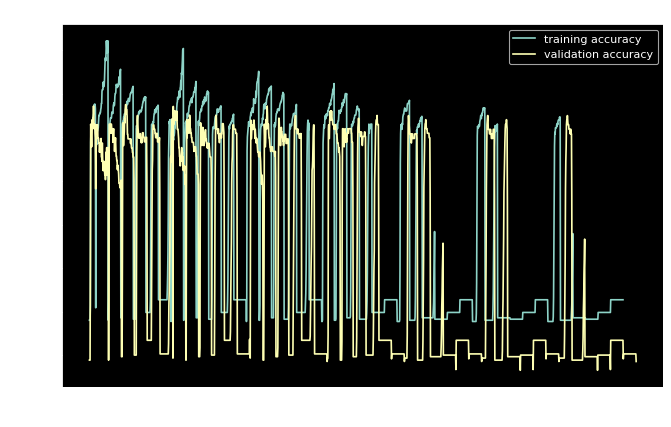

In [24]:
figure(figsize=(9.7,6), dpi=80)

plt.plot(train_accuracy_list, label='training accuracy')
plt.plot(eval_accuracy_list, label='validation accuracy')
plt.title('Accuracy vs. Epochs Completed')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#plt.savefig('acc_v_epoch.png')

In [25]:
SEED = 69
train_ratio = 0.6
test_ratio = 0.2
val_ratio = 0.2

X_train, X_tmp = train_test_split(X, test_size=test_ratio+val_ratio)
X_test, X_val = train_test_split(X_tmp,test_size=val_ratio/(val_ratio + test_ratio))
X_train, y_train = X_train.drop(columns=['is_all_star']), X_train['is_all_star']
X_test, y_test = X_test.drop(columns=['is_all_star']), X_test['is_all_star']
X_val, y_val = X_val.drop(columns=['is_all_star']), X_val['is_all_star']

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [68]:
y_pred = clf.predict(X_val)
print(y_pred)
#print(y_val.to_list())
y_val_lst = y_val.to_list()

print(np.isnan(np.array(y_pred)).any())
f1_score(y_val.to_list(), y_pred)
#print(classification_report(y_val.to_list(), y_pred, labels=['Non-All-Star', 'All-Star']))

[0 0 0 ... 0 0 0]
False


0.7039106145251396

In [69]:
import math
from sklearn.metrics import f1_score
'''
y_pred = clf.predict(X_val)
print(y_pred)
#print(y_val.to_list())
y_val_lst = y_val.to_list()

print(np.isnan(np.array(y_pred)).any())
f1_score(y_val.to_list(), y_pred)
#print(classification_report(y_val.to_list(), y_pred, labels=['Non-All-Star', 'All-Star']))

'''
max_f1, best_clf = 0.0, None
n_estim, max_dep, max_feat = None, None, None

for n_estimators in range(75, 125+1, 5):
    for max_depth in range(6, 20+1, 2):
        for max_features in ['auto', 'sqrt', 'log2']:
            print(n_estimators, max_depth, max_features)

            clf = RandomForestClassifier(random_state=0, n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_val)
            f1 = f1_score(y_val.to_list(), y_pred)
            if f1 > max_f1:
                max_f1, best_clf = f1, clf
                n_estim, max_dep, max_feat = n_estimators, max_depth, max_features

print(max_f1, n_estim, max_dep, max_feat)
#print(clf.estimators_[0].get_depth())
#print(np.average([tree.get_depth() for tree in clf.estimators_]))

75 6 auto
75 6 sqrt
75 6 log2
75 8 auto
75 8 sqrt
75 8 log2
75 10 auto
75 10 sqrt
75 10 log2
75 12 auto
75 12 sqrt
75 12 log2
75 14 auto
75 14 sqrt
75 14 log2
75 16 auto
75 16 sqrt
75 16 log2
75 18 auto
75 18 sqrt
75 18 log2
75 20 auto
75 20 sqrt
75 20 log2
80 6 auto
80 6 sqrt
80 6 log2
80 8 auto
80 8 sqrt
80 8 log2
80 10 auto
80 10 sqrt
80 10 log2
80 12 auto
80 12 sqrt
80 12 log2
80 14 auto
80 14 sqrt
80 14 log2
80 16 auto
80 16 sqrt
80 16 log2
80 18 auto
80 18 sqrt
80 18 log2
80 20 auto
80 20 sqrt
80 20 log2
85 6 auto
85 6 sqrt
85 6 log2
85 8 auto
85 8 sqrt
85 8 log2
85 10 auto
85 10 sqrt
85 10 log2
85 12 auto
85 12 sqrt
85 12 log2
85 14 auto
85 14 sqrt
85 14 log2
85 16 auto
85 16 sqrt
85 16 log2
85 18 auto
85 18 sqrt
85 18 log2
85 20 auto
85 20 sqrt
85 20 log2
90 6 auto
90 6 sqrt
90 6 log2
90 8 auto
90 8 sqrt
90 8 log2
90 10 auto
90 10 sqrt
90 10 log2
90 12 auto
90 12 sqrt
90 12 log2
90 14 auto
90 14 sqrt
90 14 log2
90 16 auto
90 16 sqrt
90 16 log2
90 18 auto
90 18 sqrt
90 18 log2
9

In [72]:
clf = RandomForestClassifier(random_state=0, n_estimators=80, max_depth=16, max_features='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test.to_list(), y_pred)
print(f1)

0.71875
